In [54]:
from collections import Counter
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from knn_model import KNN
from knn_model import accuracy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as atlas


Iris dataset contiene 4 caracteristicas de 50 muestras de tres especies de Iris. Las cuales se utilizarán para crear un modelo que clasifique dichas especies.

Información de atributos:

1. sepal length en cm 
2. sepal width en cm
3. petal length en cm
4. petal width en cm
5. class:  
-- Iris Setosa  
-- Iris Versicolour  
-- Iris Virginica  
Variables independientes 1:4  
Variable dependiente(etiqueta) 5

In [4]:
#Se carga la base de datos Iris
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [7]:
#Mostrar tamaño y dataset de variables independientes
print(X.shape)
print(X)


(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

In [8]:
#Mostrar tamaño y dataset de variable dependiente
print(y.shape)
print(y)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
#split dataset en proporción 80/20 (train/test) de acuerdo a las indicaciones del problema
#random state fijo para reordenar aleatoriamente con la misma semilla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

Para la calisificación se usará un modelo de clasificación de KNN (K Vecinos más cercanos - K Nearest Neighbors)

In [14]:
k = 3 # k es el numero de vecinos cerca a comparar
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("KNN classification accuracy", accuracy(y_test, predictions))

KNN classification accuracy 0.9333333333333333


Se obtuvo en una primera prueba un accurary de 93% lo cual es bantante preciso, sin embargo se realizarán pruebas secundarias para validar el accurary actual y realizar ajustes a los parametros del modelo en caso de que se obtenga un mejor accuracy.

In [22]:
b_accuracy = accuracy(y_test, predictions)
b_k = k
for i in range (3,20):
    k = i # k es el numero de vecinos cerca a comparar
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    a_accuracy = accuracy(y_test, predictions)
    print("KNN classification accuracy for k=" + str(k) + ' : ', accuracy(y_test, predictions))
    if a_accuracy > b_accuracy:
        b_k = i
print('k optima para obtener el mayor accuracy= ', str(b_k))

KNN classification accuracy for k=3 :  0.9333333333333333
KNN classification accuracy for k=4 :  0.9
KNN classification accuracy for k=5 :  0.9333333333333333
KNN classification accuracy for k=6 :  0.9
KNN classification accuracy for k=7 :  0.9666666666666667
KNN classification accuracy for k=8 :  0.9333333333333333
KNN classification accuracy for k=9 :  0.9666666666666667
KNN classification accuracy for k=10 :  0.9333333333333333
KNN classification accuracy for k=11 :  0.9666666666666667
KNN classification accuracy for k=12 :  0.9666666666666667
KNN classification accuracy for k=13 :  0.9666666666666667
KNN classification accuracy for k=14 :  0.9666666666666667
KNN classification accuracy for k=15 :  0.9666666666666667
KNN classification accuracy for k=16 :  0.9666666666666667
KNN classification accuracy for k=17 :  1.0
KNN classification accuracy for k=18 :  1.0
KNN classification accuracy for k=19 :  1.0
k optima para obtener el mayor accuracy=  19


Error mínimo:- 0.0 K = 16


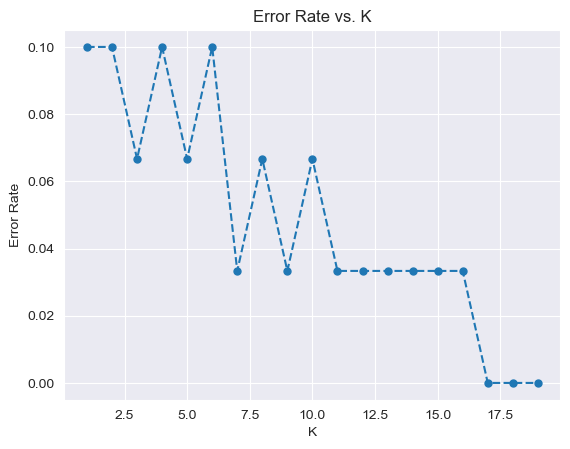

In [61]:
error_rate = []
for i in range(1,20):
    k = i # k es el numero de vecinos cerca a comparar
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

sns.set_style("darkgrid")
plt.plot(range(1,20),error_rate, linestyle='dashed', marker='o', markersize=5)
plt.title('Error Rate vs. K')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Error mínimo:-",min(error_rate),"K =",error_rate.index(min(error_rate)))

Al realizar las pruebas se comprueba que al utilizar k = 17(se obtienen resultados similares con 18  y 19) se obtiene un 100% de accuracy. Se procede a validar.

In [53]:
k = 17 # k es el numero de vecinos cerca a comparar
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("KNN classification accuracy", accuracy(y_test, predictions))

KNN classification accuracy 1.0


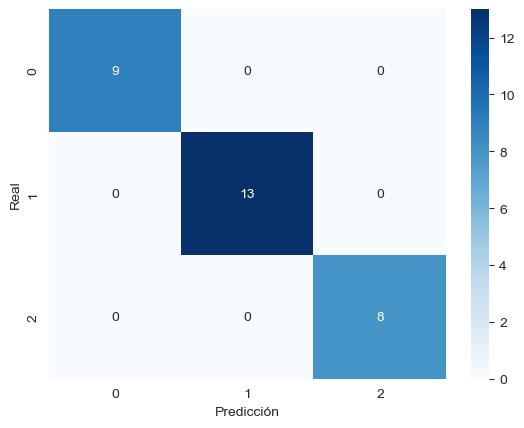

In [60]:
# Matriz de confusión de las predicciones de test
confusion_matrix_v = pd.crosstab(
    y_test.ravel(),
    predictions,
    rownames=['Real'],
    colnames=['Predicción']
)
fx = sns.heatmap(confusion_matrix_v, annot=True, cmap=plt.cm.Blues)
atlas.show()